In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import datetime
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import math
import dtreeviz
import graphviz

# GHP Regular

In [22]:
#load data
df = pd.read_csv(r"C:\Users\USER\Desktop\Aeon\DECTrees_LAOS\Laos_data_022125.csv")

#GHP - Regular category
reg_ghp_df = df[(df['segment_category'] == 'Regular') & (df['main_category'] == 'GHP')]
reg_ghp_df_final = reg_ghp_df.dropna(subset = 'agreementcd')
reg_ghp_df_final['default_tag'] = reg_ghp_df_final['default_tag'].astype(int)

reg_ghp_df_final.shape

C:\Users\USER\AppData\Local\Temp\ipykernel_15340\3517553944.py:2: DtypeWarning: Columns (11,16,17,53,160,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\USER\AppData\Local\Temp\ipykernel_15340\3517553944.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(3459, 167)

In [4]:
needed_cols = ['interest_rate', 'davincitargetgrade', 'approvalfee', 'total_on_going_agreement', 'total_agreement',
              'interest_paid_amt', 'first_payment', 'installment_amt', 'product_price', 'term',
              'total_loan_amount', 'creditscore', 'interest_amount', 'employeenum', 'working_period',
              'financial_price', 'living_period', 'TAT', 'salary', 'living_person',
              'age_as_apply_date',
              'merchant_district','product_category', 'education', 'staying_with', 'rank',
              'department', 'residence_type', 'merchant_province', 'idcardtype', 'merchantcategory',
              'corpprovince', 'province', 'gender', 'paymentchannel', 'occupation',
              'job_status_name', 'billingaddress', 'marital_status',
              'default_tag',
              'down_payment','business_type', 'district','salary_date']
working_df_reg_ghp = reg_ghp_df_final[needed_cols]

In [5]:
working_df_reg_ghp.isnull().sum()

interest_rate                 0
davincitargetgrade            0
approvalfee                   0
total_on_going_agreement      0
total_agreement               0
interest_paid_amt             0
first_payment                 0
installment_amt               0
product_price                 0
term                          0
total_loan_amount             0
creditscore                   0
interest_amount               0
employeenum                   0
working_period                0
financial_price               0
living_period                 0
TAT                           0
salary                        0
living_person                 0
age_as_apply_date             0
merchant_district             0
product_category              0
education                     0
staying_with                  0
rank                          0
department                    0
residence_type                0
merchant_province             0
idcardtype                    0
merchantcategory              0
corpprov

In [6]:
#check proper imputation
working_df_reg_ghp['billingaddress'].value_counts()

billingaddress
House     2583
Office     340
Name: count, dtype: int64

### Fill missing values

In [7]:
#missing_vals: fill missing values
#working_df_reg_ghp['department'] = working_df_reg_ghp.department.fillna('')
working_df_reg_ghp['billingaddress'] = working_df_reg_ghp.billingaddress.fillna('House')
# working_df_reg_ghp['education'] = working_df_reg_ghp.education.fillna()
# working_df_reg_ghp['business_type'] = working_df_reg_ghp.business_type.fillna()

C:\Users\USER\AppData\Local\Temp\ipykernel_15340\95310846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### save final df; check if there are no missing values

In [8]:
working_df = working_df_reg_ghp.copy()

In [10]:
working_df.isnull().sum()

interest_rate               0
davincitargetgrade          0
approvalfee                 0
total_on_going_agreement    0
total_agreement             0
interest_paid_amt           0
first_payment               0
installment_amt             0
product_price               0
term                        0
total_loan_amount           0
creditscore                 0
interest_amount             0
employeenum                 0
working_period              0
financial_price             0
living_period               0
TAT                         0
salary                      0
living_person               0
age_as_apply_date           0
merchant_district           0
product_category            0
education                   0
staying_with                0
rank                        0
department                  0
residence_type              0
merchant_province           0
idcardtype                  0
merchantcategory            0
corpprovince                0
province                    0
gender    

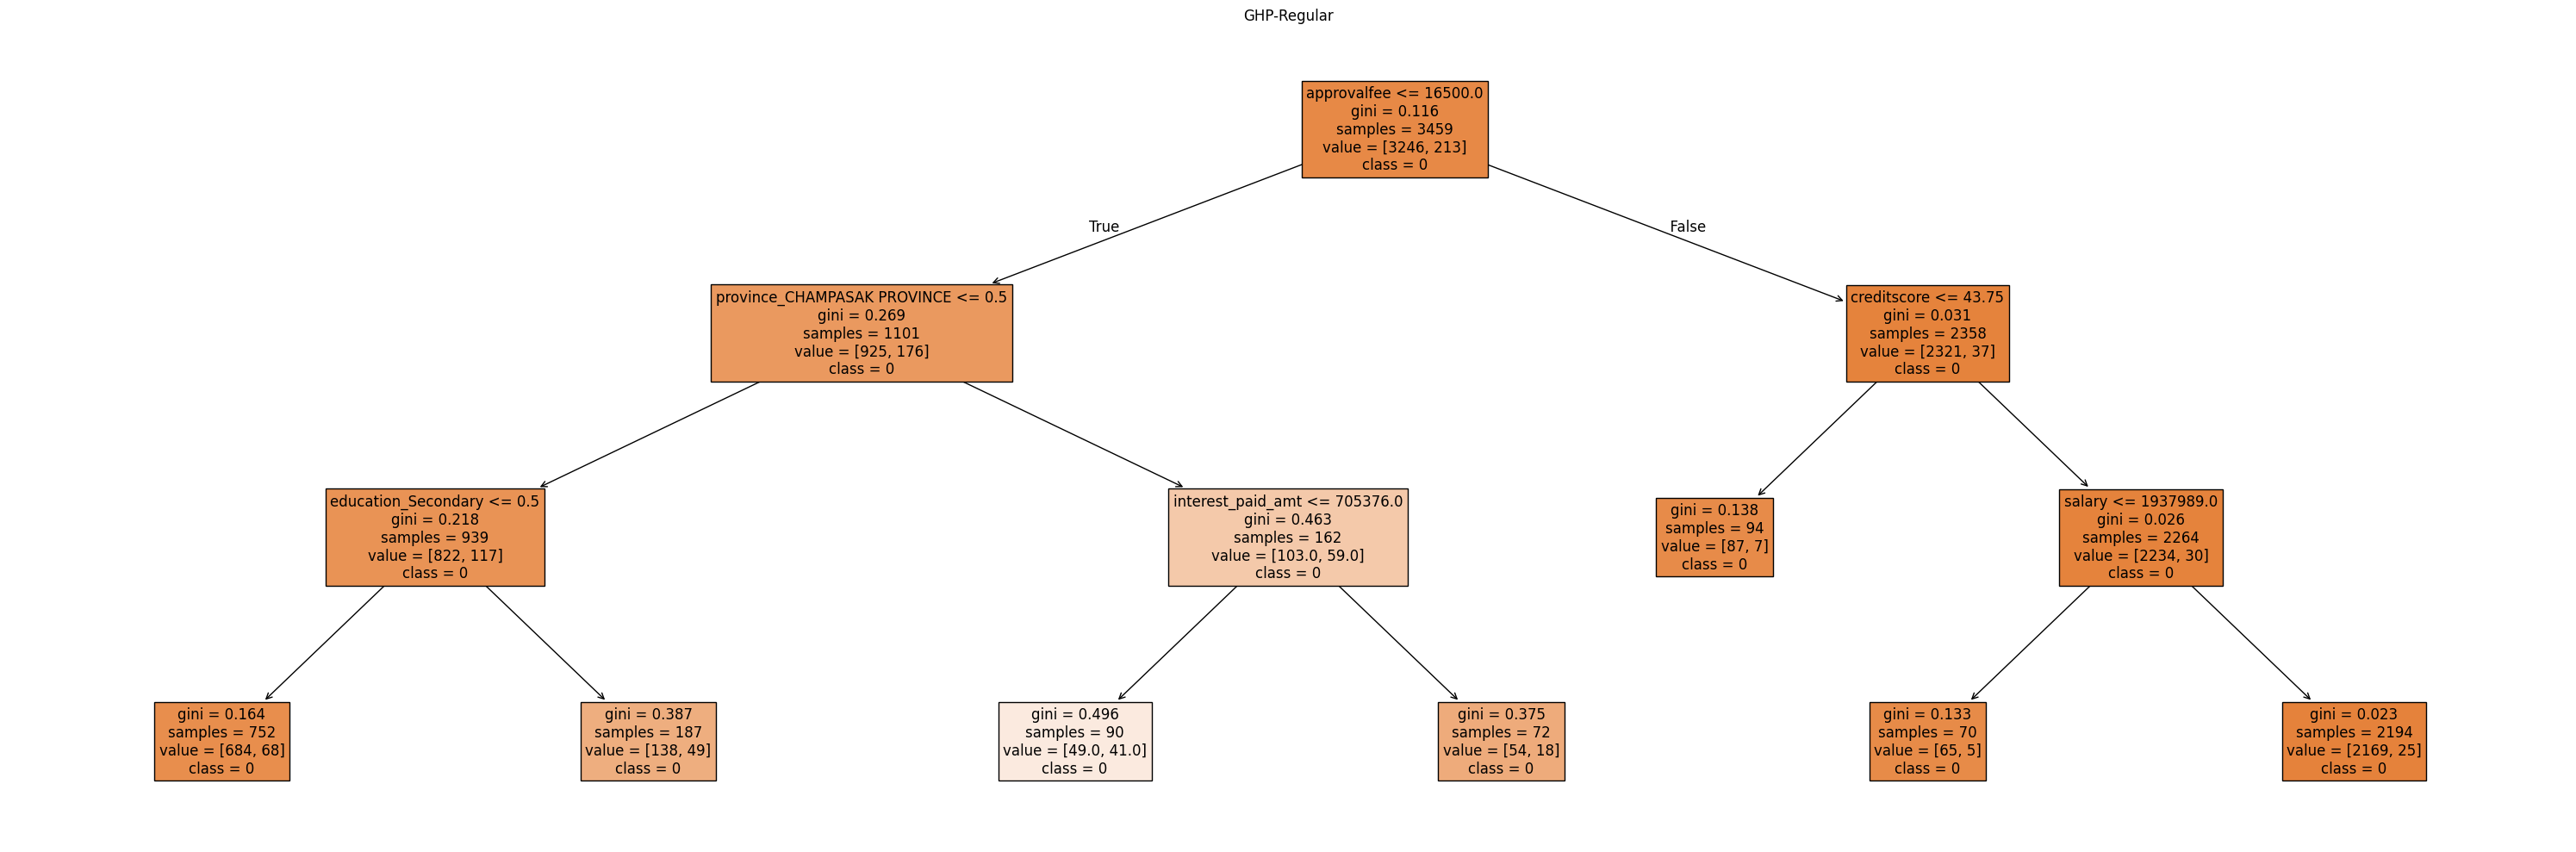

In [14]:
#Dec Tree for GHP Regular
depth = 3

y = 'default_tag'
final_df = working_df.copy()
X = final_df.drop(columns=y)
y = final_df[y]

X = pd.get_dummies(X)

clf = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = 0.02, random_state = 11)
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(30, 10)) #3
tree.plot_tree(clf, filled=True, 
               feature_names=clf.feature_names_in_.tolist(), 
               class_names=['0', '1'],
              fontsize=12)
plt.title('GHP-Regular')
plt.tight_layout();

In [18]:
viz_model = dtreeviz.model(clf, 
                          X, y,
                          feature_names=clf.feature_names_in_.tolist(),
                          class_names=['0', '1'])

v = viz_model.view(scale=0.8)
v.show()
#v.save('GHP_depth_3.svg')

C:\Users\USER\global_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data lim

## GHP-Member

In [23]:
#GHP - Member category
reg_ghp_df = df[(df['segment_category'] == 'Member') & (df['main_category'] == 'GHP')]
reg_ghp_df_final = reg_ghp_df.dropna(subset = 'agreementcd')
reg_ghp_df_final['default_tag'] = reg_ghp_df_final['default_tag'].astype(int)

reg_ghp_df_final.shape

C:\Users\USER\AppData\Local\Temp\ipykernel_15340\3561871309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(56228, 167)

In [24]:
working_df_reg_ghp = reg_ghp_df_final[needed_cols]

In [25]:
working_df_reg_ghp.isnull().sum()

interest_rate                  0
davincitargetgrade             0
approvalfee                    0
total_on_going_agreement       0
total_agreement                0
interest_paid_amt              0
first_payment                  0
installment_amt                0
product_price                  0
term                           0
total_loan_amount              0
creditscore                    0
interest_amount                0
employeenum                    0
working_period                 0
financial_price                0
living_period                  0
TAT                            0
salary                         0
living_person                  0
age_as_apply_date              0
merchant_district              0
product_category               0
education                      2
staying_with                   0
rank                           0
department                     1
residence_type                 0
merchant_province              0
idcardtype                     0
merchantca

In [26]:
#missing_vals: department,billingaddress, education, business_type
working_df_reg_ghp['department'] = working_df_reg_ghp.department.fillna('Others')
working_df_reg_ghp['billingaddress'] = working_df_reg_ghp.billingaddress.fillna('House')
working_df_reg_ghp['education'] = working_df_reg_ghp.education.fillna('Others')
working_df_reg_ghp['business_type'] = working_df_reg_ghp.business_type.fillna('Others')

C:\Users\USER\AppData\Local\Temp\ipykernel_15340\2595017980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\USER\AppData\Local\Temp\ipykernel_15340\2595017980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\USER\AppData\Local\Temp\ipykernel_15340\2595017980.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [29]:
variable = 'business_type'
#working_df_reg_ghp[variable].value_counts()

In [27]:
working_df = working_df_reg_ghp.copy()
working_df.isnull().sum()

interest_rate               0
davincitargetgrade          0
approvalfee                 0
total_on_going_agreement    0
total_agreement             0
interest_paid_amt           0
first_payment               0
installment_amt             0
product_price               0
term                        0
total_loan_amount           0
creditscore                 0
interest_amount             0
employeenum                 0
working_period              0
financial_price             0
living_period               0
TAT                         0
salary                      0
living_person               0
age_as_apply_date           0
merchant_district           0
product_category            0
education                   0
staying_with                0
rank                        0
department                  0
residence_type              0
merchant_province           0
idcardtype                  0
merchantcategory            0
corpprovince                0
province                    0
gender    

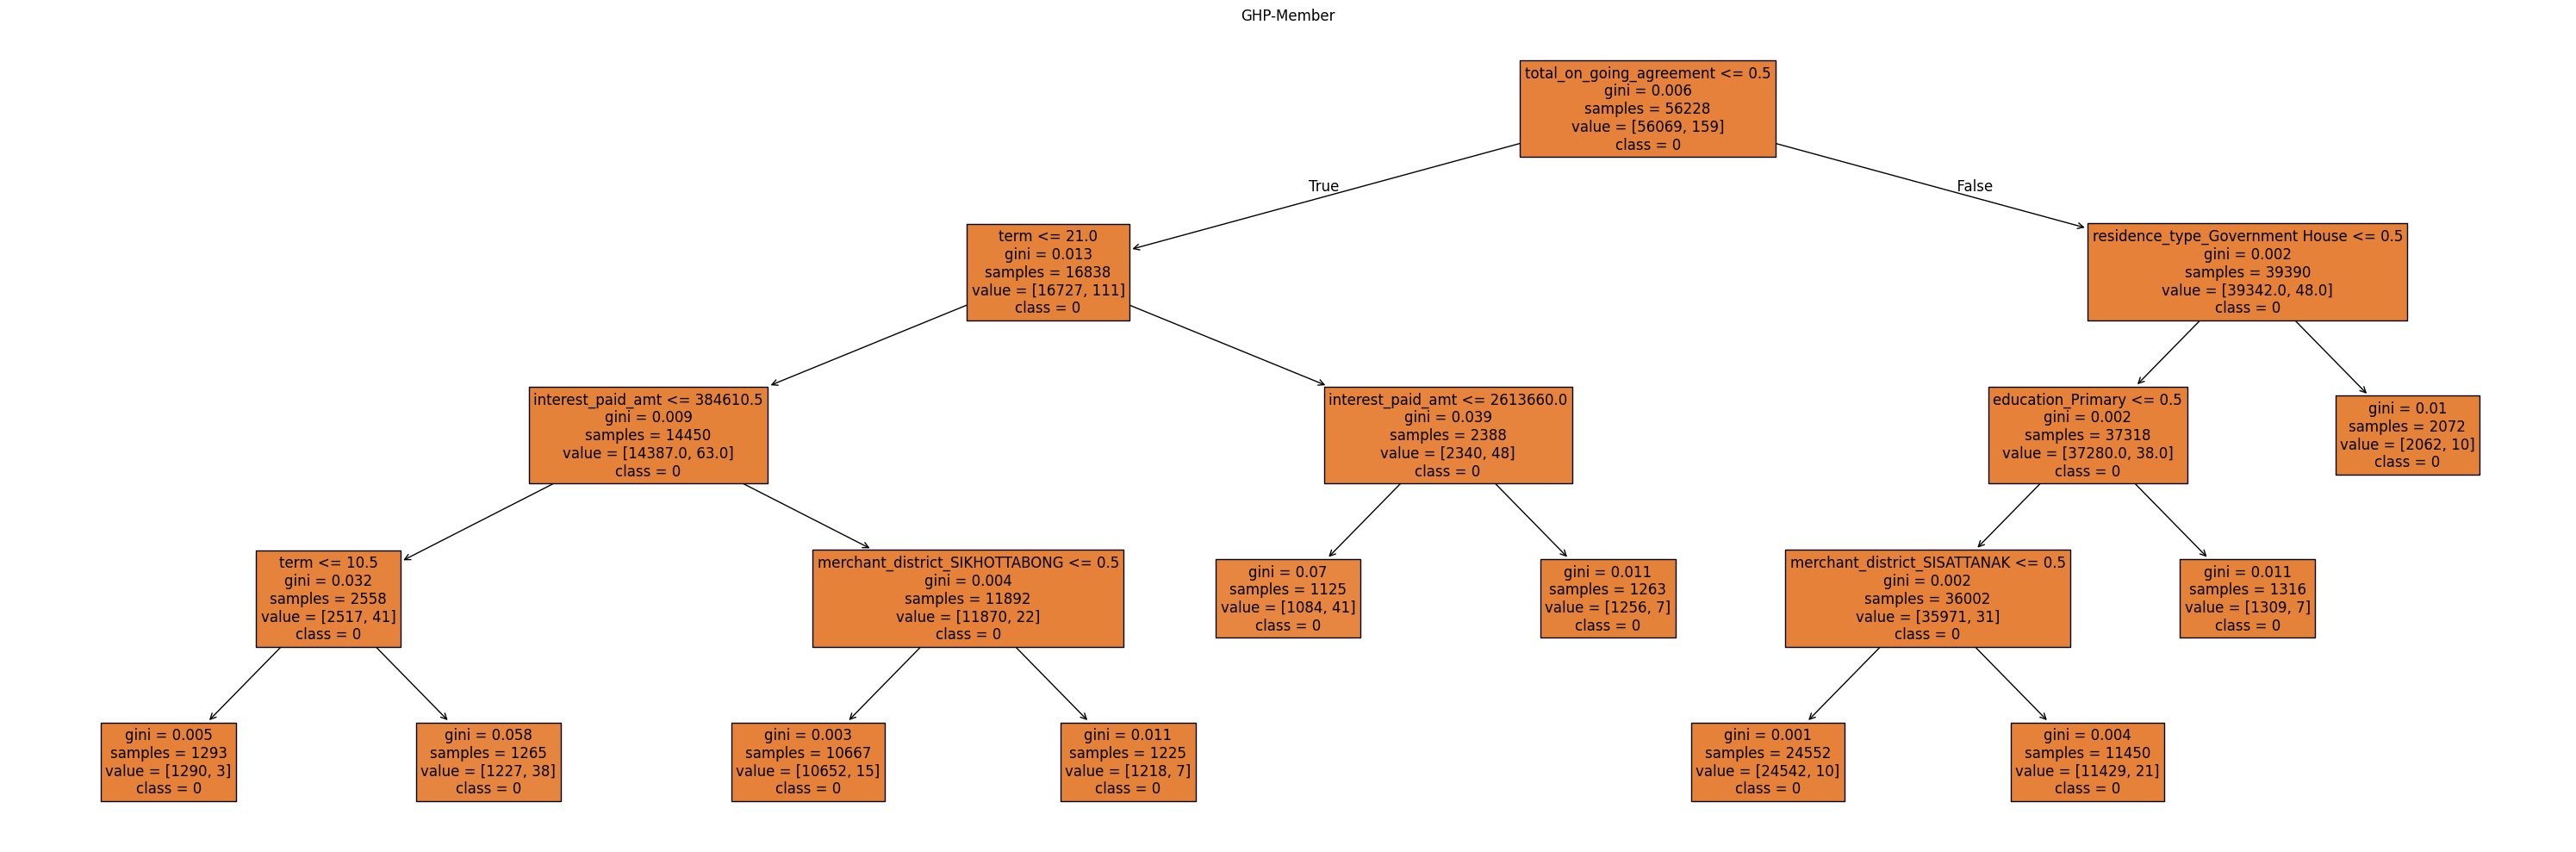

In [30]:
#Dec Tree for GHP Member
depth = 4

y = 'default_tag'
final_df = working_df.copy()
X = final_df.drop(columns=y)
y = final_df[y]

X = pd.get_dummies(X)

clf = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = 0.02, random_state = 11)
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(30, 10)) #3
tree.plot_tree(clf, filled=True, 
               feature_names=clf.feature_names_in_.tolist(), 
               class_names=['0', '1'],
              fontsize=12)
plt.title('GHP-Member')
plt.tight_layout();

In [31]:
viz_model = dtreeviz.model(clf, 
                          X, y,
                          feature_names=clf.feature_names_in_.tolist(),
                          class_names=['0', '1'])

v = viz_model.view(scale=0.8)
v.show()
#v.save('GHP_depth_3.svg')

C:\Users\USER\global_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data lim

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# GOLD - Regular

In [32]:
#load data
df = pd.read_csv(r"C:\Users\USER\Desktop\Aeon\DECTrees_LAOS\Laos_data_022125.csv")

#GHP - Regular category
reg_ghp_df = df[(df['segment_category'] == 'Regular') & (df['main_category'] == 'GOLD')]
reg_ghp_df_final = reg_ghp_df.dropna(subset = 'agreementcd')
reg_ghp_df_final['default_tag'] = reg_ghp_df_final['default_tag'].astype(int)

reg_ghp_df_final.shape

C:\Users\USER\AppData\Local\Temp\ipykernel_15340\3942193359.py:2: DtypeWarning: Columns (11,16,17,53,160,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\USER\AppData\Local\Temp\ipykernel_15340\3942193359.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(197, 167)

In [33]:
needed_cols = ['interest_rate', 'davincitargetgrade', 'approvalfee', 'total_on_going_agreement', 'total_agreement',
              'interest_paid_amt', 'first_payment', 'installment_amt', 'product_price', 'term',
              'total_loan_amount', 'creditscore', 'interest_amount', 'employeenum', 'working_period',
              'financial_price', 'living_period', 'TAT', 'salary', 'living_person',
              'age_as_apply_date',
              'merchant_district','product_category', 'education', 'staying_with', 'rank',
              'department', 'residence_type', 'merchant_province', 'idcardtype', 'merchantcategory',
              'corpprovince', 'province', 'gender', 'paymentchannel', 'occupation',
              'job_status_name', 'billingaddress', 'marital_status',
              'default_tag',
              'down_payment','business_type', 'district','salary_date']
working_df_reg_ghp = reg_ghp_df_final[needed_cols]

In [34]:
working_df_reg_ghp.isnull().sum()

interest_rate                0
davincitargetgrade           0
approvalfee                  0
total_on_going_agreement     0
total_agreement              0
interest_paid_amt            0
first_payment                0
installment_amt              0
product_price                0
term                         0
total_loan_amount            0
creditscore                  0
interest_amount              0
employeenum                  0
working_period               0
financial_price              0
living_period                0
TAT                          0
salary                       0
living_person                0
age_as_apply_date            0
merchant_district            0
product_category             0
education                    0
staying_with                 0
rank                         0
department                   0
residence_type               0
merchant_province            0
idcardtype                   0
merchantcategory             0
corpprovince                 0
province

In [35]:
#check proper imputation
working_df_reg_ghp['billingaddress'].value_counts()

billingaddress
House     157
Office     23
Name: count, dtype: int64

### Fill missing values

In [36]:
#missing_vals: fill missing values
#working_df_reg_ghp['department'] = working_df_reg_ghp.department.fillna('')
working_df_reg_ghp['billingaddress'] = working_df_reg_ghp.billingaddress.fillna('House')
# working_df_reg_ghp['education'] = working_df_reg_ghp.education.fillna()
# working_df_reg_ghp['business_type'] = working_df_reg_ghp.business_type.fillna()

C:\Users\USER\AppData\Local\Temp\ipykernel_15340\95310846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### save final df; check if there are no missing values

In [37]:
working_df = working_df_reg_ghp.copy()

In [38]:
working_df.isnull().sum()

interest_rate               0
davincitargetgrade          0
approvalfee                 0
total_on_going_agreement    0
total_agreement             0
interest_paid_amt           0
first_payment               0
installment_amt             0
product_price               0
term                        0
total_loan_amount           0
creditscore                 0
interest_amount             0
employeenum                 0
working_period              0
financial_price             0
living_period               0
TAT                         0
salary                      0
living_person               0
age_as_apply_date           0
merchant_district           0
product_category            0
education                   0
staying_with                0
rank                        0
department                  0
residence_type              0
merchant_province           0
idcardtype                  0
merchantcategory            0
corpprovince                0
province                    0
gender    

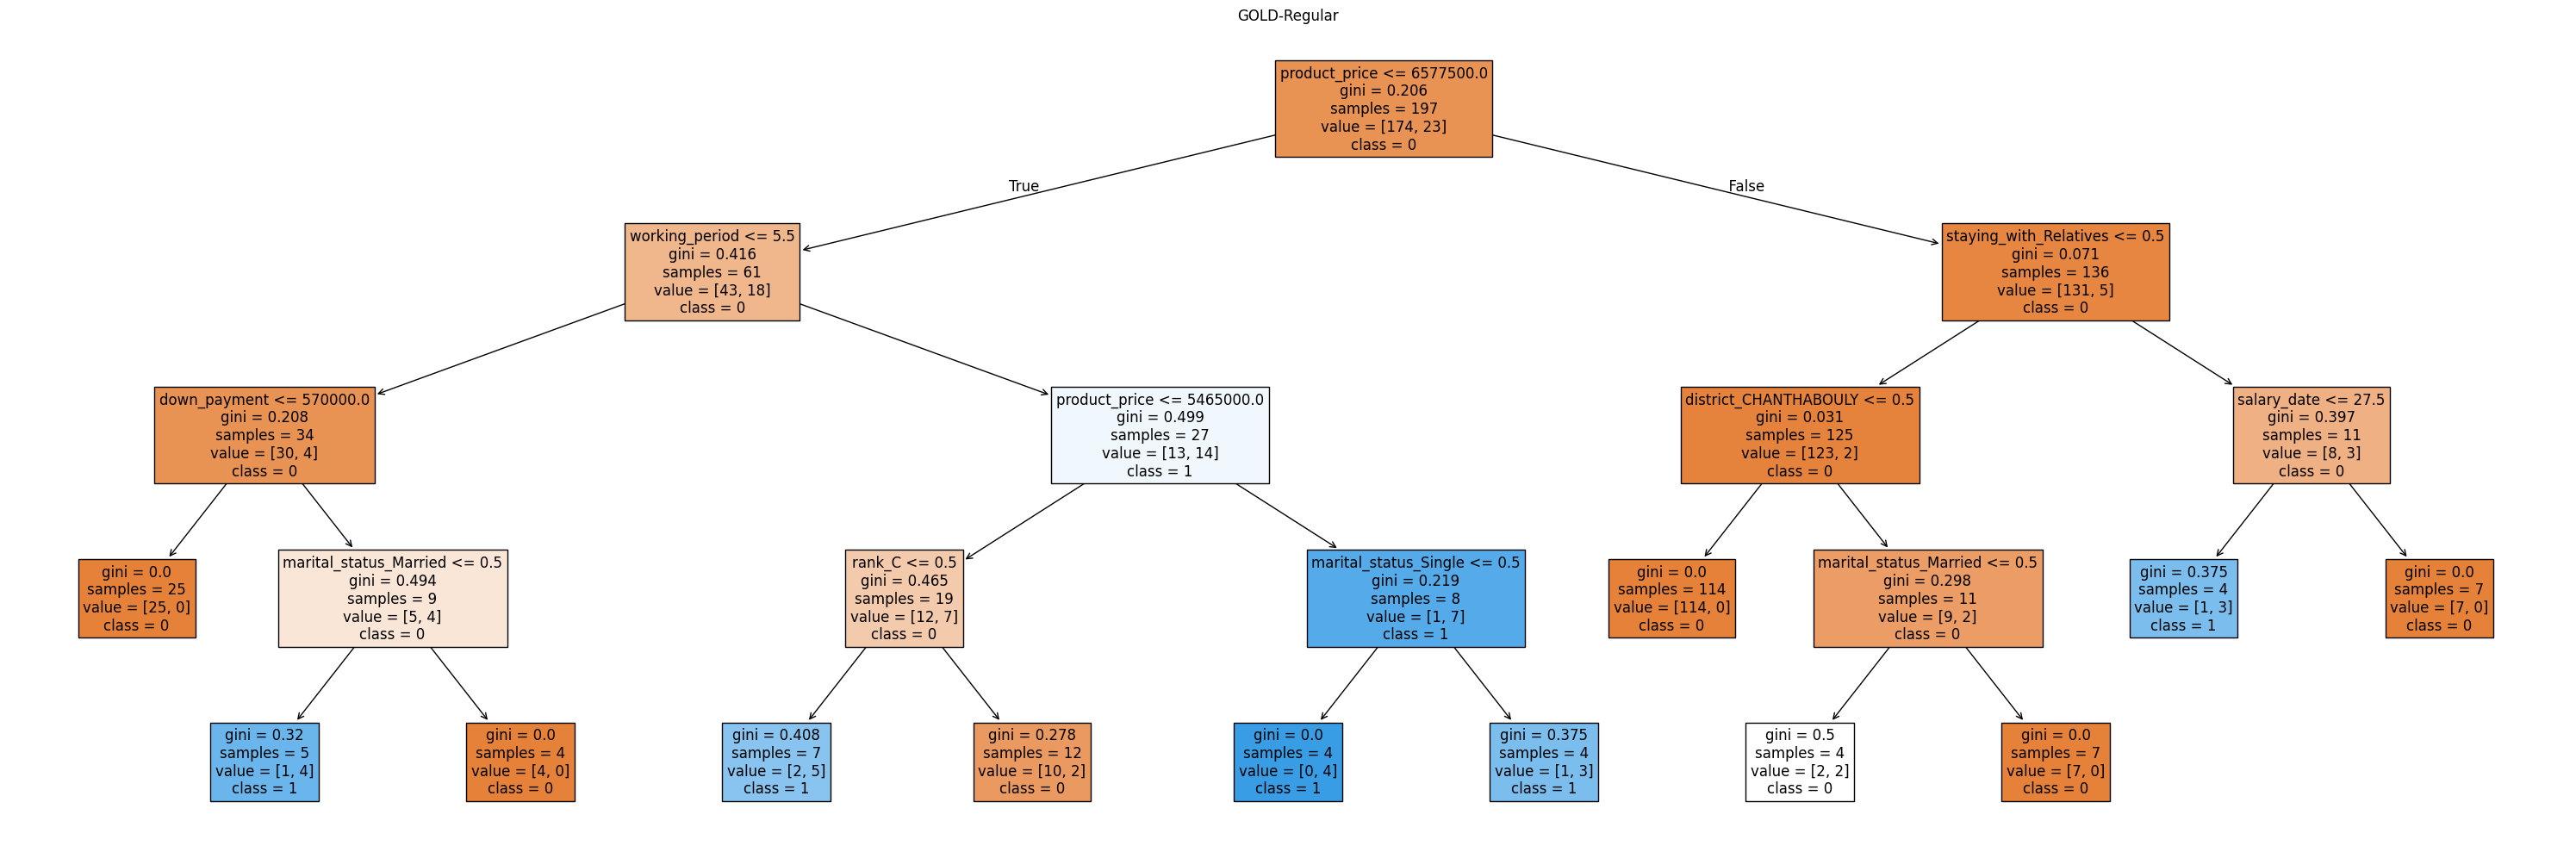

In [42]:
#Dec Tree for GOLD Regular
depth = 4

y = 'default_tag'
final_df = working_df.copy()
X = final_df.drop(columns=y)
y = final_df[y]

X = pd.get_dummies(X)

clf = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = 0.02, random_state = 11)
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(30, 10)) #3
tree.plot_tree(clf, filled=True, 
               feature_names=clf.feature_names_in_.tolist(), 
               class_names=['0', '1'],
              fontsize=12)
plt.title('GOLD-Regular')
plt.tight_layout();

In [43]:
viz_model = dtreeviz.model(clf, 
                          X, y,
                          feature_names=clf.feature_names_in_.tolist(),
                          class_names=['0', '1'])

v = viz_model.view(scale=0.8)
v.show()
#v.save('GHP_depth_3.svg')

C:\Users\USER\global_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data lim

# GOLD - Member

In [44]:
#load data
df = pd.read_csv(r"C:\Users\USER\Desktop\Aeon\DECTrees_LAOS\Laos_data_022125.csv")

#GHP - Regular category
reg_ghp_df = df[(df['segment_category'] == 'Member') & (df['main_category'] == 'GOLD')]
reg_ghp_df_final = reg_ghp_df.dropna(subset = 'agreementcd')
reg_ghp_df_final['default_tag'] = reg_ghp_df_final['default_tag'].astype(int)

reg_ghp_df_final.shape

C:\Users\USER\AppData\Local\Temp\ipykernel_15340\2332728258.py:2: DtypeWarning: Columns (11,16,17,53,160,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\USER\AppData\Local\Temp\ipykernel_15340\2332728258.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(5651, 167)

In [45]:
needed_cols = ['interest_rate', 'davincitargetgrade', 'approvalfee', 'total_on_going_agreement', 'total_agreement',
              'interest_paid_amt', 'first_payment', 'installment_amt', 'product_price', 'term',
              'total_loan_amount', 'creditscore', 'interest_amount', 'employeenum', 'working_period',
              'financial_price', 'living_period', 'TAT', 'salary', 'living_person',
              'age_as_apply_date',
              'merchant_district','product_category', 'education', 'staying_with', 'rank',
              'department', 'residence_type', 'merchant_province', 'idcardtype', 'merchantcategory',
              'corpprovince', 'province', 'gender', 'paymentchannel', 'occupation',
              'job_status_name', 'billingaddress', 'marital_status',
              'default_tag',
              'down_payment','business_type', 'district','salary_date']
working_df_reg_ghp = reg_ghp_df_final[needed_cols]

In [53]:
working_df_reg_ghp.default_tag.value_counts()

default_tag
0    5596
1      55
Name: count, dtype: int64

In [54]:
working_df_reg_ghp.isnull().sum()

interest_rate               0
davincitargetgrade          0
approvalfee                 0
total_on_going_agreement    0
total_agreement             0
interest_paid_amt           0
first_payment               0
installment_amt             0
product_price               0
term                        0
total_loan_amount           0
creditscore                 0
interest_amount             0
employeenum                 0
working_period              0
financial_price             0
living_period               0
TAT                         0
salary                      0
living_person               0
age_as_apply_date           0
merchant_district           0
product_category            0
education                   0
staying_with                0
rank                        0
department                  0
residence_type              0
merchant_province           0
idcardtype                  0
merchantcategory            0
corpprovince                0
province                    0
gender    

In [47]:
#check proper imputation
working_df_reg_ghp['billingaddress'].value_counts()

billingaddress
House     4538
Office    1055
Name: count, dtype: int64

### Fill missing values

In [48]:
#missing_vals: fill missing values
#working_df_reg_ghp['department'] = working_df_reg_ghp.department.fillna('')
working_df_reg_ghp['billingaddress'] = working_df_reg_ghp.billingaddress.fillna('House')
# working_df_reg_ghp['education'] = working_df_reg_ghp.education.fillna()
# working_df_reg_ghp['business_type'] = working_df_reg_ghp.business_type.fillna()

C:\Users\USER\AppData\Local\Temp\ipykernel_15340\95310846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### save final df; check if there are no missing values

In [49]:
working_df = working_df_reg_ghp.copy()

In [50]:
working_df.isnull().sum()

interest_rate               0
davincitargetgrade          0
approvalfee                 0
total_on_going_agreement    0
total_agreement             0
interest_paid_amt           0
first_payment               0
installment_amt             0
product_price               0
term                        0
total_loan_amount           0
creditscore                 0
interest_amount             0
employeenum                 0
working_period              0
financial_price             0
living_period               0
TAT                         0
salary                      0
living_person               0
age_as_apply_date           0
merchant_district           0
product_category            0
education                   0
staying_with                0
rank                        0
department                  0
residence_type              0
merchant_province           0
idcardtype                  0
merchantcategory            0
corpprovince                0
province                    0
gender    

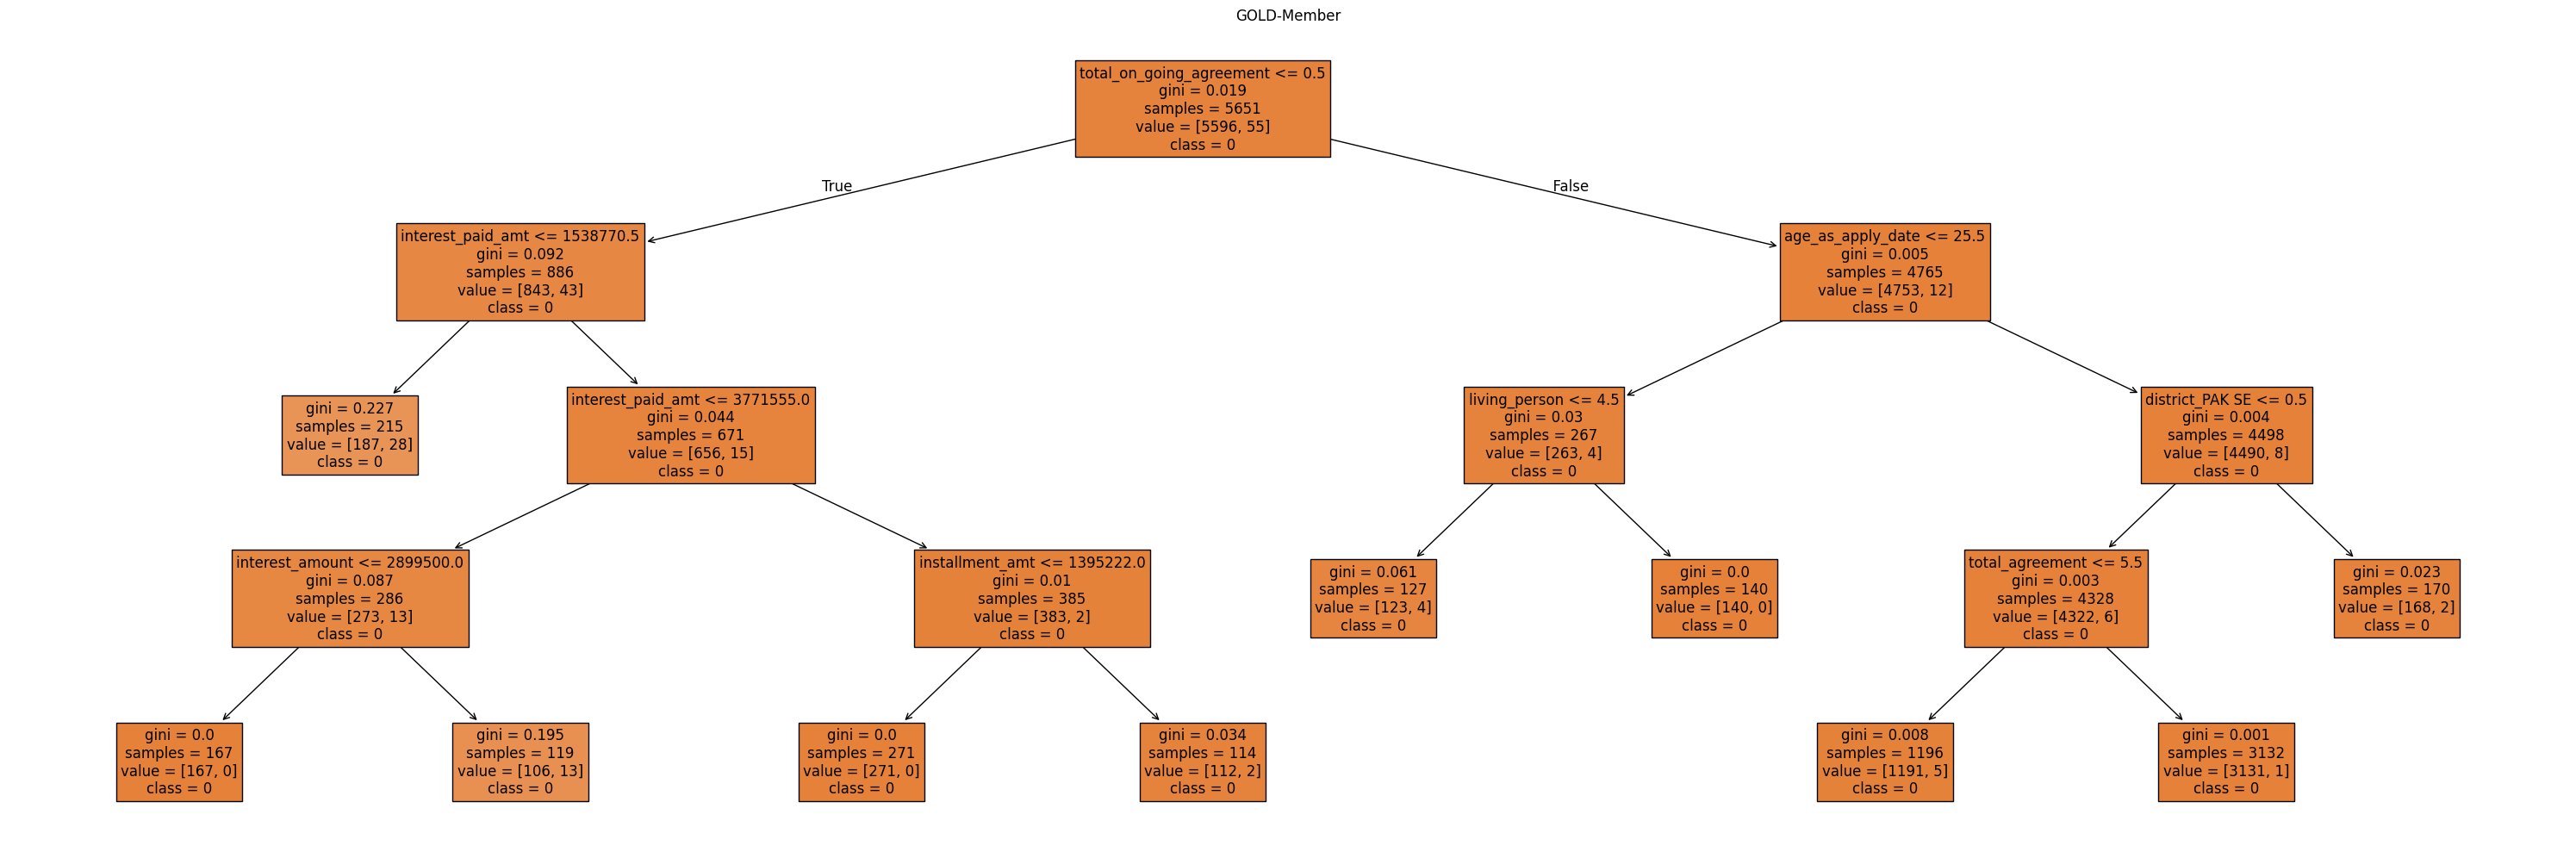

In [57]:
#Dec Tree for GOLD Member
depth = 4

y = 'default_tag'
final_df = working_df.copy()
X = final_df.drop(columns=y)
y = final_df[y]

X = pd.get_dummies(X)

clf = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = 0.02, random_state = 11)
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(30, 10)) #3
tree.plot_tree(clf, filled=True, 
               feature_names=clf.feature_names_in_.tolist(), 
               class_names=['0', '1'],
              fontsize=12)
plt.title('GOLD-Member')
plt.tight_layout();

In [56]:
viz_model = dtreeviz.model(clf, 
                          X, y,
                          feature_names=clf.feature_names_in_.tolist(),
                          class_names=['0', '1'])

v = viz_model.view(scale=0.8)
v.show()
#v.save('GHP_depth_3.svg')

C:\Users\USER\global_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data lim

# MOTORCYCLE Regular

In [3]:
#load data
df = pd.read_csv(r"C:\Users\USER\Desktop\Aeon\DECTrees_LAOS\Laos_data_022125.csv")

#Motorcycle - Regular category
reg_ghp_df = df[(df['segment_category'] == 'Regular') & (df['main_category'] == 'MOTORCYCLE')]
reg_ghp_df_final = reg_ghp_df.dropna(subset = 'agreementcd')
reg_ghp_df_final['default_tag'] = reg_ghp_df_final['default_tag'].astype(int)

reg_ghp_df_final.shape

C:\Users\USER\AppData\Local\Temp\ipykernel_11676\159100463.py:2: DtypeWarning: Columns (11,16,17,53,160,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\USER\AppData\Local\Temp\ipykernel_11676\159100463.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(532, 167)

In [4]:
needed_cols = ['interest_rate', 'davincitargetgrade', 'approvalfee', 'total_on_going_agreement', 'total_agreement',
              'interest_paid_amt', 'first_payment', 'installment_amt', 'product_price', 'term',
              'total_loan_amount', 'creditscore', 'interest_amount', 'employeenum', 'working_period',
              'financial_price', 'living_period', 'TAT', 'salary', 'living_person',
              'age_as_apply_date',
              'merchant_district','product_category', 'education', 'staying_with', 'rank',
              'department', 'residence_type', 'merchant_province', 'idcardtype', 'merchantcategory',
              'corpprovince', 'province', 'gender', 'paymentchannel', 'occupation',
              'job_status_name', 'billingaddress', 'marital_status',
              'default_tag',
              'down_payment','business_type', 'district','salary_date']
working_df_reg_ghp = reg_ghp_df_final[needed_cols]

In [5]:
working_df_reg_ghp.isnull().sum()

interest_rate                0
davincitargetgrade           0
approvalfee                  0
total_on_going_agreement     0
total_agreement              0
interest_paid_amt            0
first_payment                0
installment_amt              0
product_price                0
term                         0
total_loan_amount            0
creditscore                  0
interest_amount              0
employeenum                  0
working_period               0
financial_price              0
living_period                0
TAT                          0
salary                       0
living_person                0
age_as_apply_date            0
merchant_district            0
product_category             0
education                    0
staying_with                 0
rank                         0
department                   0
residence_type               0
merchant_province            0
idcardtype                   0
merchantcategory             0
corpprovince                 0
province

In [6]:
#check proper imputation
working_df_reg_ghp['billingaddress'].value_counts()

billingaddress
House     344
Office    168
Name: count, dtype: int64

### Fill missing values

In [7]:
#missing_vals: fill missing values
#working_df_reg_ghp['department'] = working_df_reg_ghp.department.fillna('')
working_df_reg_ghp['billingaddress'] = working_df_reg_ghp.billingaddress.fillna('House')
# working_df_reg_ghp['education'] = working_df_reg_ghp.education.fillna()
# working_df_reg_ghp['business_type'] = working_df_reg_ghp.business_type.fillna()

C:\Users\USER\AppData\Local\Temp\ipykernel_11676\95310846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### save final df; check if there are no missing values

In [8]:
working_df = working_df_reg_ghp.copy()

In [12]:
working_df['default_tag'].value_counts()

default_tag
0    500
1     32
Name: count, dtype: int64

In [9]:
working_df.isnull().sum()

interest_rate               0
davincitargetgrade          0
approvalfee                 0
total_on_going_agreement    0
total_agreement             0
interest_paid_amt           0
first_payment               0
installment_amt             0
product_price               0
term                        0
total_loan_amount           0
creditscore                 0
interest_amount             0
employeenum                 0
working_period              0
financial_price             0
living_period               0
TAT                         0
salary                      0
living_person               0
age_as_apply_date           0
merchant_district           0
product_category            0
education                   0
staying_with                0
rank                        0
department                  0
residence_type              0
merchant_province           0
idcardtype                  0
merchantcategory            0
corpprovince                0
province                    0
gender    

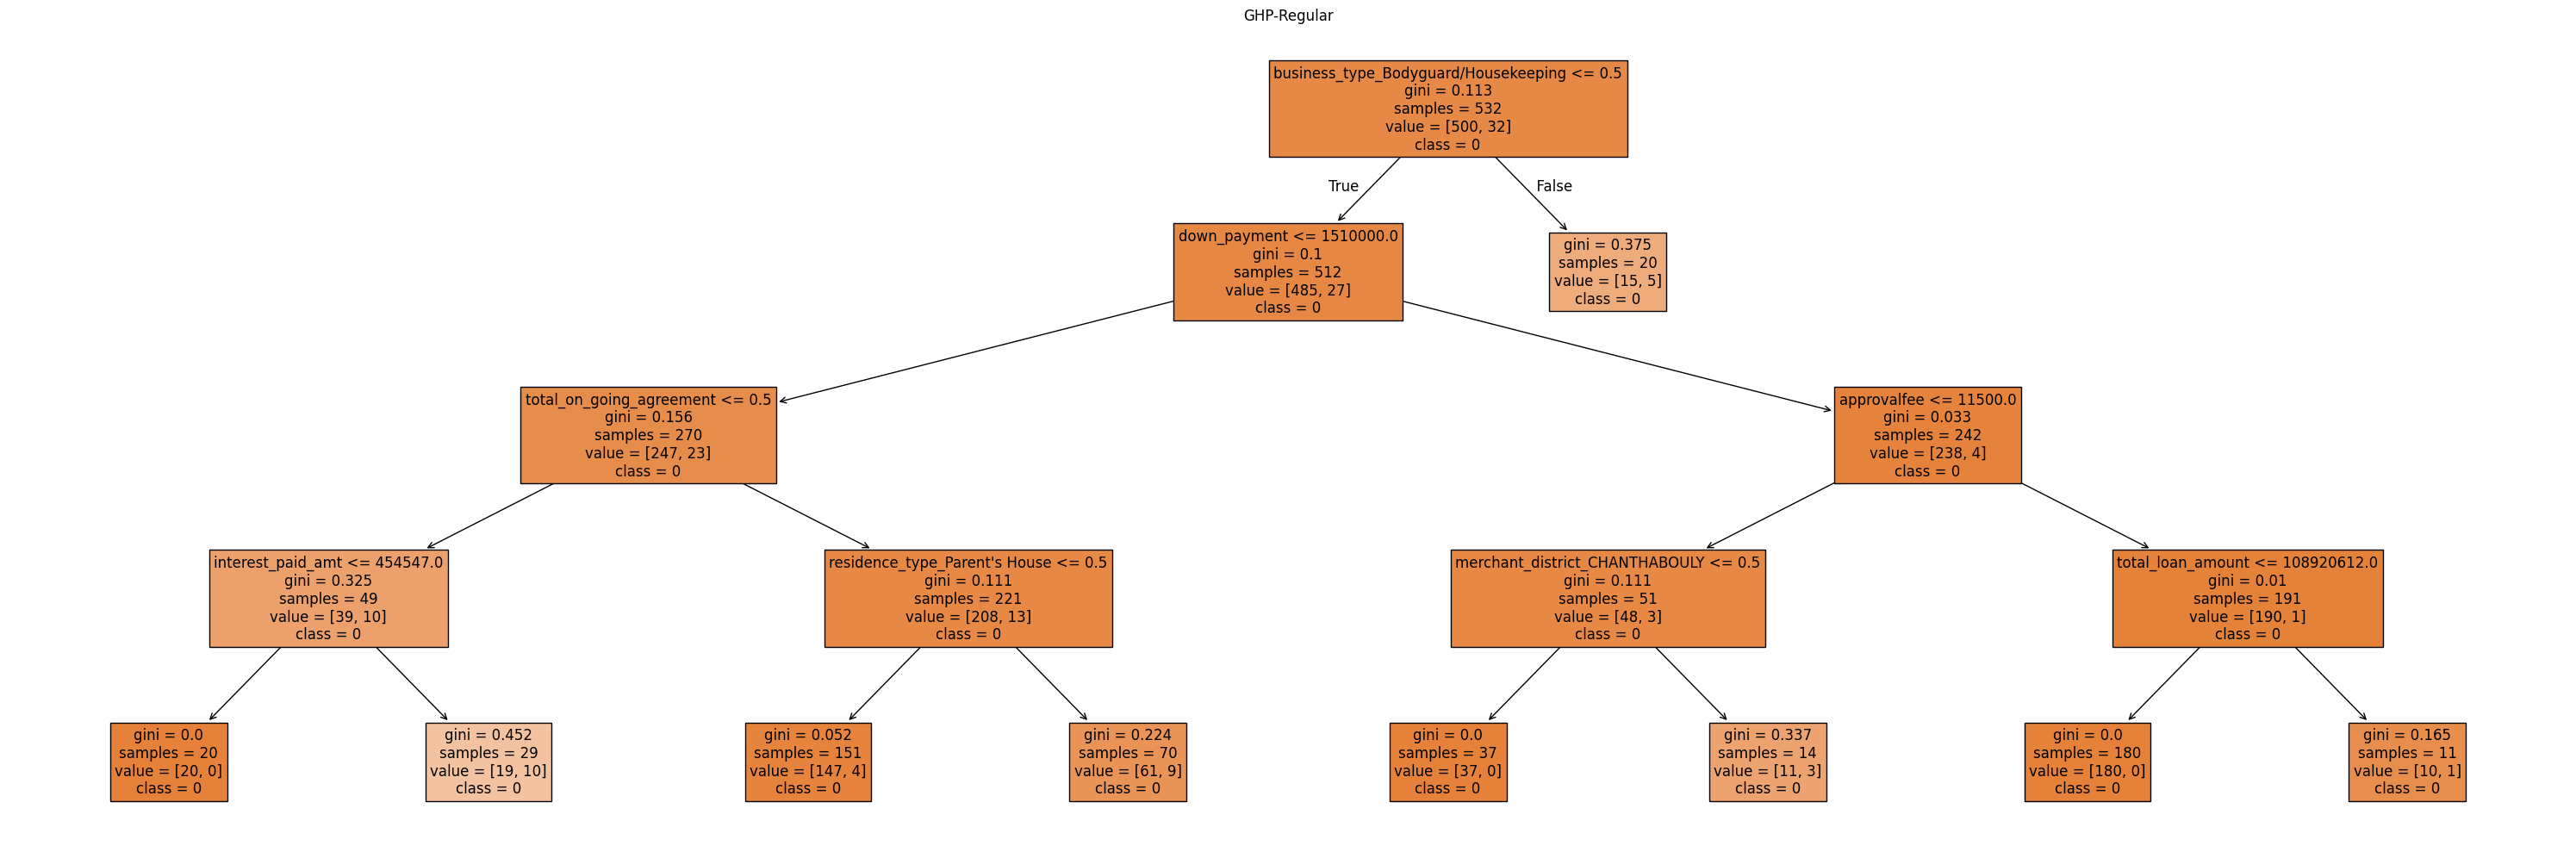

In [13]:
#Dec Tree for GHP Regular
depth = 4

y = 'default_tag'
final_df = working_df.copy()
X = final_df.drop(columns=y)
y = final_df[y]

X = pd.get_dummies(X)

clf = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = 0.02, random_state = 11)
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(30, 10)) #3
tree.plot_tree(clf, filled=True, 
               feature_names=clf.feature_names_in_.tolist(), 
               class_names=['0', '1'],
              fontsize=12)
plt.title('GHP-Regular')
plt.tight_layout();

In [14]:
viz_model = dtreeviz.model(clf, 
                          X, y,
                          feature_names=clf.feature_names_in_.tolist(),
                          class_names=['0', '1'])

v = viz_model.view(scale=0.8)
v.show()
#v.save('GHP_depth_3.svg')

C:\Users\USER\global_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


# MOTORCYCLE Member

In [15]:
#load data
df = pd.read_csv(r"C:\Users\USER\Desktop\Aeon\DECTrees_LAOS\Laos_data_022125.csv")

#Motorcycle - Member category
reg_ghp_df = df[(df['segment_category'] == 'Member') & (df['main_category'] == 'MOTORCYCLE')]
reg_ghp_df_final = reg_ghp_df.dropna(subset = 'agreementcd')
reg_ghp_df_final['default_tag'] = reg_ghp_df_final['default_tag'].astype(int)

reg_ghp_df_final.shape

C:\Users\USER\AppData\Local\Temp\ipykernel_11676\1439972409.py:2: DtypeWarning: Columns (11,16,17,53,160,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\USER\AppData\Local\Temp\ipykernel_11676\1439972409.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(2593, 167)

In [16]:
needed_cols = ['interest_rate', 'davincitargetgrade', 'approvalfee', 'total_on_going_agreement', 'total_agreement',
              'interest_paid_amt', 'first_payment', 'installment_amt', 'product_price', 'term',
              'total_loan_amount', 'creditscore', 'interest_amount', 'employeenum', 'working_period',
              'financial_price', 'living_period', 'TAT', 'salary', 'living_person',
              'age_as_apply_date',
              'merchant_district','product_category', 'education', 'staying_with', 'rank',
              'department', 'residence_type', 'merchant_province', 'idcardtype', 'merchantcategory',
              'corpprovince', 'province', 'gender', 'paymentchannel', 'occupation',
              'job_status_name', 'billingaddress', 'marital_status',
              'default_tag',
              'down_payment','business_type', 'district','salary_date']
working_df_reg_ghp = reg_ghp_df_final[needed_cols]

In [17]:
working_df_reg_ghp.isnull().sum()

interest_rate                 0
davincitargetgrade            0
approvalfee                   0
total_on_going_agreement      0
total_agreement               0
interest_paid_amt             0
first_payment                 0
installment_amt               0
product_price                 0
term                          0
total_loan_amount             0
creditscore                   0
interest_amount               0
employeenum                   0
working_period                0
financial_price               0
living_period                 0
TAT                           0
salary                        0
living_person                 0
age_as_apply_date             0
merchant_district             0
product_category              0
education                     0
staying_with                  0
rank                          0
department                    0
residence_type                0
merchant_province             0
idcardtype                    0
merchantcategory              0
corpprov

In [18]:
#check proper imputation
working_df_reg_ghp['billingaddress'].value_counts()

billingaddress
House     1695
Office     768
Name: count, dtype: int64

### Fill missing values

In [19]:
#missing_vals: fill missing values
#working_df_reg_ghp['department'] = working_df_reg_ghp.department.fillna('')
working_df_reg_ghp['billingaddress'] = working_df_reg_ghp.billingaddress.fillna('House')
# working_df_reg_ghp['education'] = working_df_reg_ghp.education.fillna()
# working_df_reg_ghp['business_type'] = working_df_reg_ghp.business_type.fillna()

C:\Users\USER\AppData\Local\Temp\ipykernel_11676\95310846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### save final df; check if there are no missing values

In [20]:
working_df = working_df_reg_ghp.copy()

In [21]:
working_df['default_tag'].value_counts()

default_tag
0    2543
1      50
Name: count, dtype: int64

In [22]:
working_df.isnull().sum()

interest_rate               0
davincitargetgrade          0
approvalfee                 0
total_on_going_agreement    0
total_agreement             0
interest_paid_amt           0
first_payment               0
installment_amt             0
product_price               0
term                        0
total_loan_amount           0
creditscore                 0
interest_amount             0
employeenum                 0
working_period              0
financial_price             0
living_period               0
TAT                         0
salary                      0
living_person               0
age_as_apply_date           0
merchant_district           0
product_category            0
education                   0
staying_with                0
rank                        0
department                  0
residence_type              0
merchant_province           0
idcardtype                  0
merchantcategory            0
corpprovince                0
province                    0
gender    

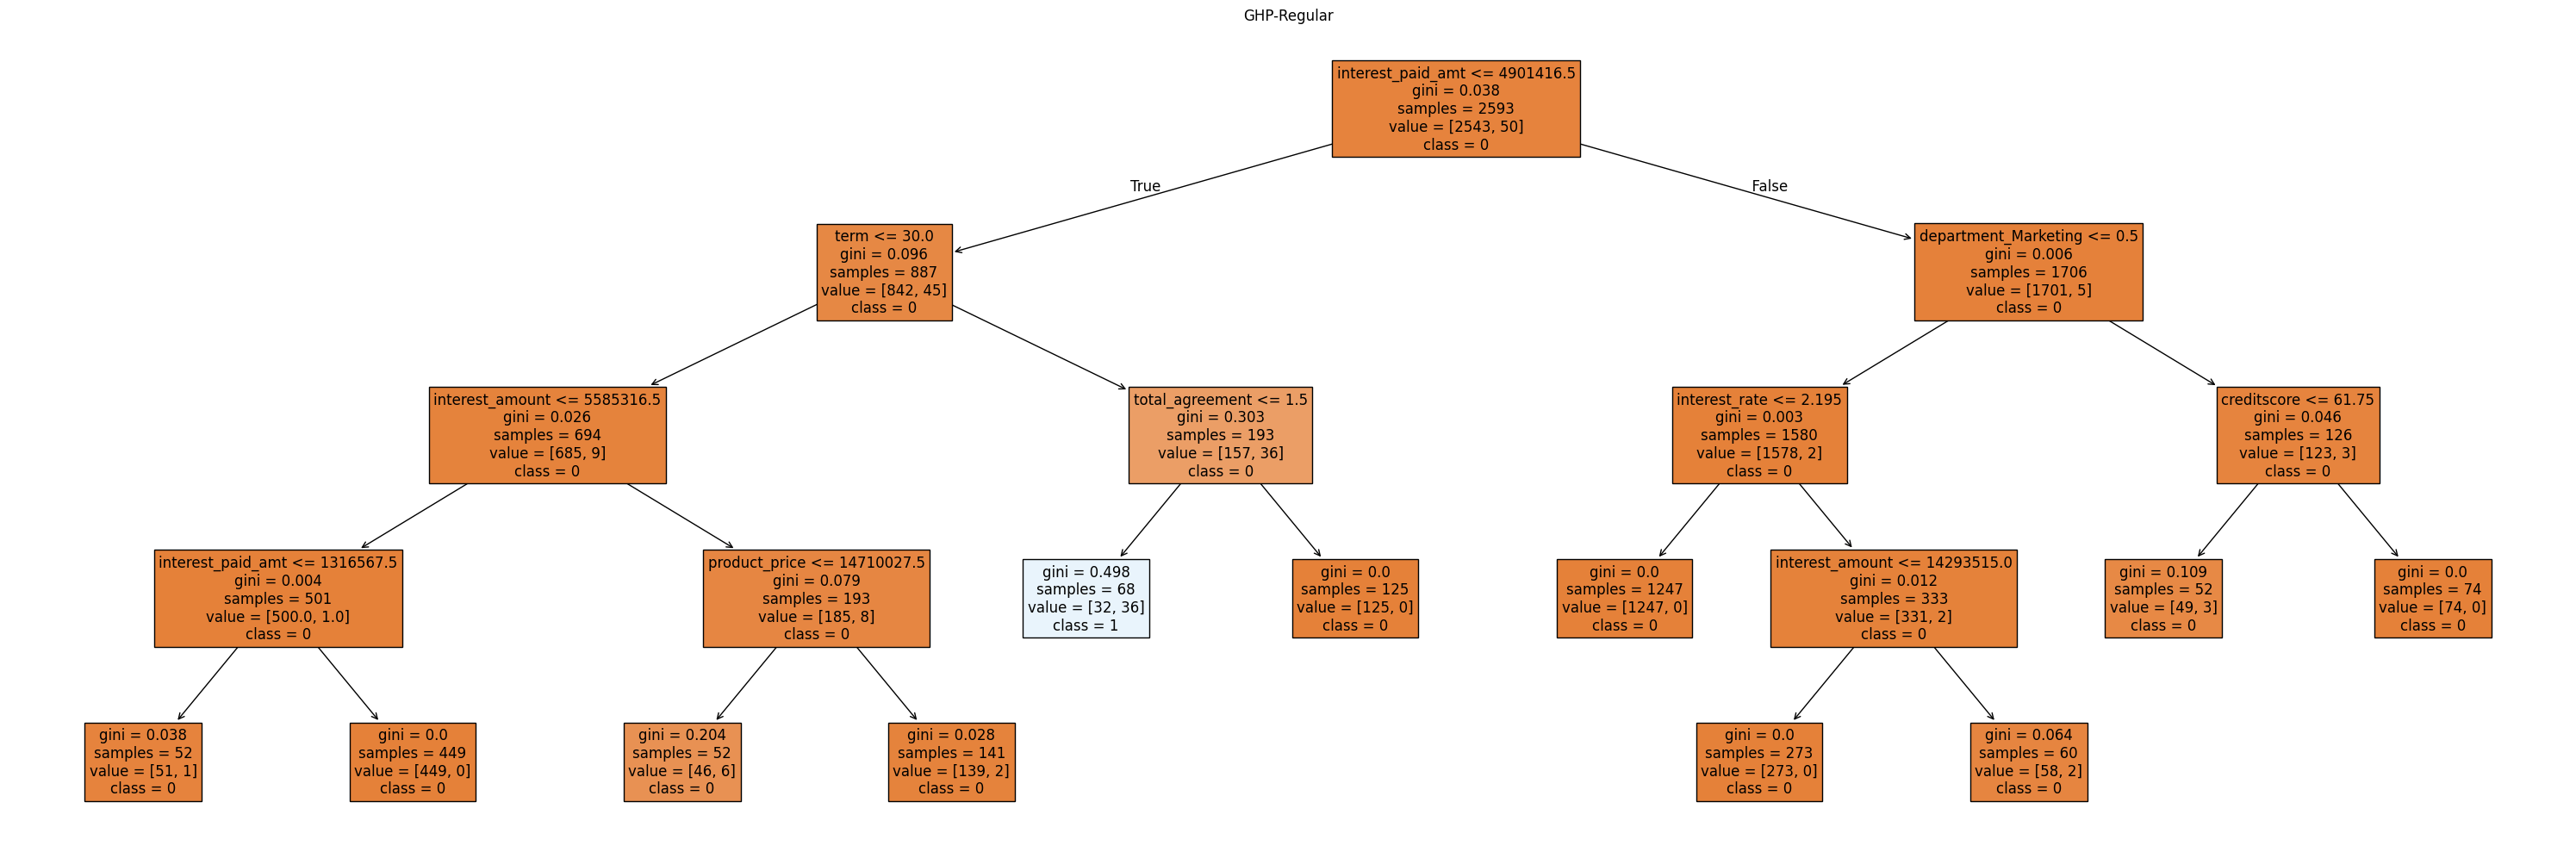

In [25]:
#Dec Tree for GHP Regular
depth = 4

y = 'default_tag'
final_df = working_df.copy()
X = final_df.drop(columns=y)
y = final_df[y]

X = pd.get_dummies(X)

clf = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = 0.02, random_state = 11)
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(30, 10)) #3
tree.plot_tree(clf, filled=True, 
               feature_names=clf.feature_names_in_.tolist(), 
               class_names=['0', '1'],
              fontsize=12)
plt.title('GHP-Regular')
plt.tight_layout();

In [26]:
viz_model = dtreeviz.model(clf, 
                          X, y,
                          feature_names=clf.feature_names_in_.tolist(),
                          class_names=['0', '1'])

v = viz_model.view(scale=0.8)
v.show()
#v.save('GHP_depth_3.svg')

C:\Users\USER\global_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data lim